In [3]:
!pip install pandas numpy scikit-learn matplotlib seaborn imbalanced-learn joblib

%matplotlib inline

In [4]:
import os


project_name = "Network_Intrusion"


folders = [
    "data/raw",
    "notebooks",
    "src",
    "models",
    "utils",
    "results"
]

for folder in folders:
    os.makedirs(f"{project_name}/{folder}", exist_ok=True)
    print(f"Created directory: {project_name}/{folder}")

%cd {project_name}


Created directory: Network_Intrusion/data/raw
Created directory: Network_Intrusion/notebooks
Created directory: Network_Intrusion/src
Created directory: Network_Intrusion/models
Created directory: Network_Intrusion/utils
Created directory: Network_Intrusion/results
/content/Network_Intrusion


In [5]:
!wget -P data/raw/ https://github.com/defcom17/NSL_KDD/raw/master/KDDTrain%2B.txt
!wget -P data/raw/ https://github.com/defcom17/NSL_KDD/raw/master/KDDTest%2B.txt
!wget -P data/raw/ https://github.com/defcom17/NSL_KDD/raw/master/KDDTest-21.txt


!ls -la data/raw/

--2025-08-27 13:51:57--  https://github.com/defcom17/NSL_KDD/raw/master/KDDTrain%2B.txt
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/Jehuty4949/NSL_KDD/raw/master/KDDTrain%2B.txt [following]
--2025-08-27 13:51:57--  https://github.com/Jehuty4949/NSL_KDD/raw/master/KDDTrain%2B.txt
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Jehuty4949/NSL_KDD/master/KDDTrain%2B.txt [following]
--2025-08-27 13:51:57--  https://raw.githubusercontent.com/Jehuty4949/NSL_KDD/master/KDDTrain%2B.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting resp

Training set shape: (125973, 43)
Test set shape: (22544, 43)

Training set columns: ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label', 'difficulty_level']

First 5 rows of training set:


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21



Label distribution in training set:
label
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

Label distribution in test set:
label
normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpg

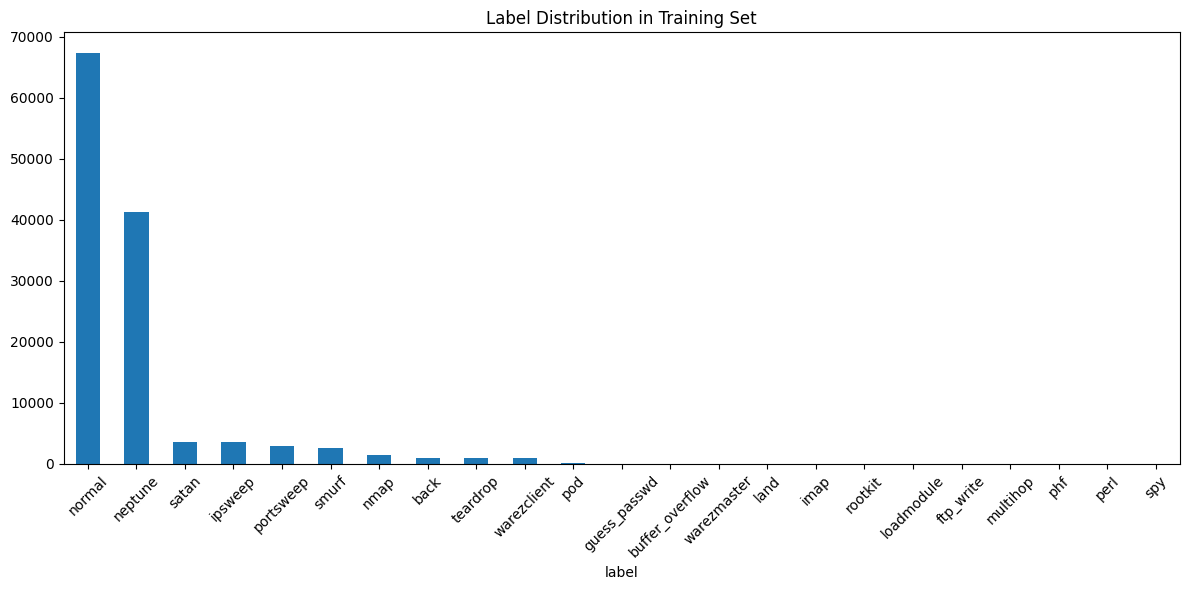

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

column_names = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes",
    "land", "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in",
    "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations",
    "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login",
    "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate",
    "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate",
    "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
    "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
    "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label", "difficulty_level"
]


train_df = pd.read_csv('data/raw/KDDTrain+.txt', header=None, names=column_names)
test_df = pd.read_csv('data/raw/KDDTest+.txt', header=None, names=column_names)


print("Training set shape:", train_df.shape)
print("Test set shape:", test_df.shape)
print("\nTraining set columns:", train_df.columns.tolist())
print("\nFirst 5 rows of training set:")
display(train_df.head())


print("\nLabel distribution in training set:")
print(train_df['label'].value_counts())
print("\nLabel distribution in test set:")
print(test_df['label'].value_counts())


plt.figure(figsize=(12, 6))
train_df['label'].value_counts().plot(kind='bar')
plt.title('Label Distribution in Training Set')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('results/label_distribution.png')
plt.show()

In [7]:
df = pd.concat([train_df, test_df], ignore_index=True)


print("Missing values in combined dataset:")
print(df.isnull().sum().sum())


categorical_cols = ['protocol_type', 'service', 'flag']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    joblib.dump(le, f'models/label_encoder_{col}.pkl')


df['attack_type'] = df['label'].apply(lambda x: 0 if x == 'normal' else 1)


attack_type_encoder = LabelEncoder()
df['attack_category'] = attack_type_encoder.fit_transform(df['label'])
joblib.dump(attack_type_encoder, 'models/attack_type_encoder.pkl')


df.drop(['label', 'difficulty_level'], axis=1, inplace=True)


X = df.drop(['attack_type', 'attack_category'], axis=1)
y_binary = df['attack_type']
y_multiclass = df['attack_category']


train_size = len(train_df)
X_train, y_train_binary, y_train_multiclass = X[:train_size], y_binary[:train_size], y_multiclass[:train_size]
X_test, y_test_binary, y_test_multiclass = X[train_size:], y_binary[train_size:], y_multiclass[train_size:]


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


joblib.dump(scaler, 'models/scaler.pkl')

print("Data preprocessing completed!")
print("Training set shape:", X_train_scaled.shape)
print("Test set shape:", X_test_scaled.shape)

Missing values in combined dataset:
0
Data preprocessing completed!
Training set shape: (125973, 41)
Test set shape: (22544, 41)


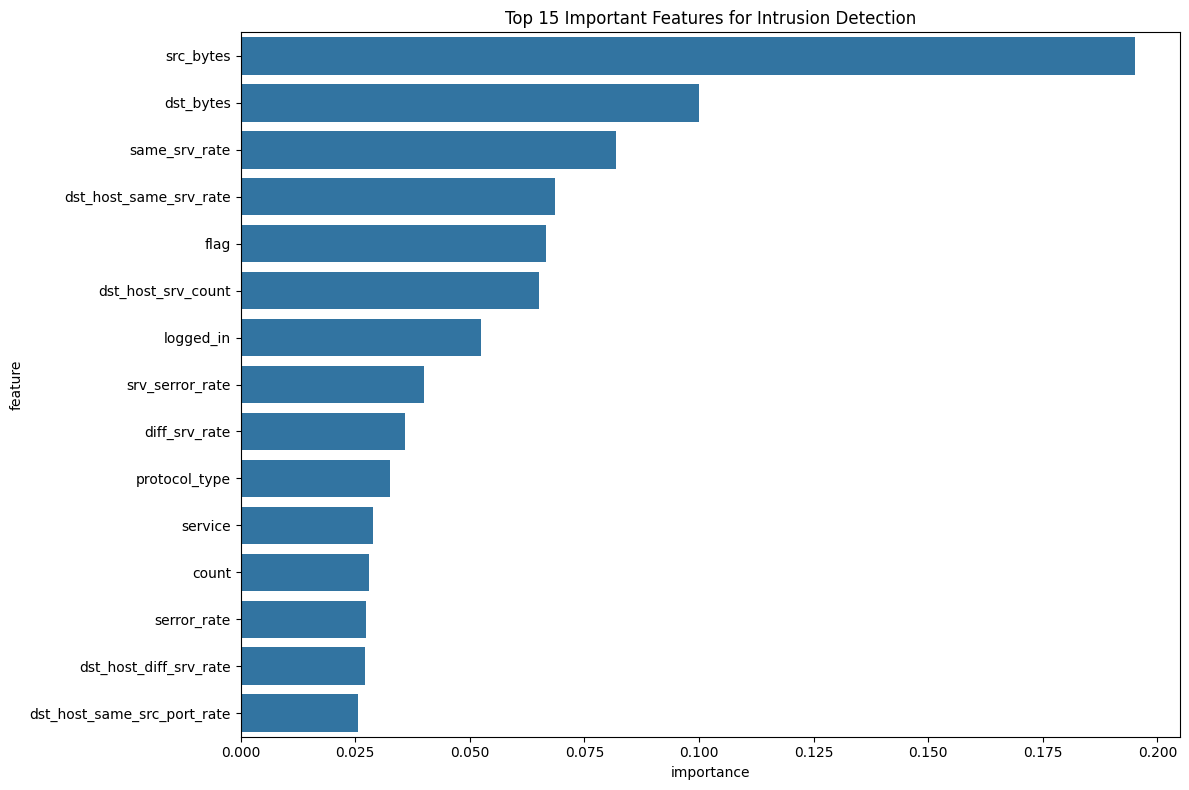

Selected 21 important features: ['src_bytes', 'dst_bytes', 'same_srv_rate', 'dst_host_same_srv_rate', 'flag', 'dst_host_srv_count', 'logged_in', 'srv_serror_rate', 'diff_srv_rate', 'protocol_type', 'service', 'count', 'serror_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'srv_count', 'dst_host_rerror_rate', 'dst_host_count', 'dst_host_srv_serror_rate', 'hot']


['models/scaler_selected.pkl']

In [8]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train_binary)


feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)


plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
plt.title('Top 15 Important Features for Intrusion Detection')
plt.tight_layout()
plt.savefig('results/feature_importance.png')
plt.show()


selected_features = feature_importance[feature_importance['importance'] > 0.01]['feature'].tolist()
print(f"Selected {len(selected_features)} important features: {selected_features}")


X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


scaler_selected = StandardScaler()
X_train_selected_scaled = scaler_selected.fit_transform(X_train_selected)
X_test_selected_scaled = scaler_selected.transform(X_test_selected)


joblib.dump(selected_features, 'models/selected_features.pkl')
joblib.dump(scaler_selected, 'models/scaler_selected.pkl')

In [11]:
%%writefile src/train_model.py

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import os

def train_and_evaluate_models(X_train, X_test, y_train, y_test, model_type='binary'):
    """
    Train and evaluate multiple models
    """
    models = {
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
        'SVM': SVC(kernel='rbf', random_state=42, probability=True),
        'Naive Bayes': GaussianNB()
    }

    results = {}

    for name, model in models.items():
        print(f"Training {name}...")
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)

        # Generate classification report
        report = classification_report(y_test, y_pred, output_dict=True)

        # Store results
        results[name] = {
            'model': model,
            'accuracy': accuracy,
            'report': report,
            'predictions': y_pred
        }

        print(f"{name} Accuracy: {accuracy:.4f}")

        # Save the model
        joblib.dump(model, f'models/{name.replace(" ", "_").lower()}_{model_type}.pkl')

    return results

def plot_results(results, y_test, model_type='binary'):
    """
    Plot model comparison results
    """
    # Extract accuracies
    model_names = list(results.keys())
    accuracies = [results[name]['accuracy'] for name in model_names]

    # Create bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=accuracies, y=model_names)
    plt.title(f'Model Comparison ({model_type} classification)')
    plt.xlabel('Accuracy')
    plt.xlim(0, 1)

    # Add value labels on bars
    for i, v in enumerate(accuracies):
        plt.text(v + 0.01, i, f'{v:.4f}', color='black', va='center')

    plt.tight_layout()
    plt.savefig(f'results/model_comparison_{model_type}.png')
    plt.show()

    # Plot confusion matrix for the best model
    best_model_name = model_names[np.argmax(accuracies)]
    best_result = results[best_model_name]

    cm = confusion_matrix(y_test, best_result['predictions'])
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {best_model_name} ({model_type})')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.savefig(f'results/confusion_matrix_{model_type}.png')
    plt.show()

    return model_names, accuracies

if __name__ == "__main__":
    # Create directories if they don't exist
    os.makedirs('data/processed', exist_ok=True)
    os.makedirs('models', exist_ok=True)
    os.makedirs('results', exist_ok=True)

    # Load the preprocessed data (this should be done from files)
    # First, let's check if we have the processed data files
    try:
        # If you've already saved processed data, load them
        X_train_scaled = joblib.load('data/processed/X_train_scaled.pkl')
        X_test_scaled = joblib.load('data/processed/X_test_scaled.pkl')
        y_train_binary = joblib.load('data/processed/y_train_binary.pkl')
        y_test_binary = joblib.load('data/processed/y_test_binary.pkl')
        y_train_multiclass = joblib.load('data/processed/y_train_multiclass.pkl')
        y_test_multiclass = joblib.load('data/processed/y_test_multiclass.pkl')

        print("Loaded preprocessed data from files.")

    except FileNotFoundError:
        print("Processed data files not found. Please run the preprocessing steps first.")
        exit(1)

    # Train and evaluate binary classification models
    print("Binary Classification Models:")
    binary_results = train_and_evaluate_models(
        X_train_scaled,
        X_test_scaled,
        y_train_binary,
        y_test_binary,
        'binary'
    )

    # Plot binary results
    binary_models, binary_accuracies = plot_results(binary_results, y_test_binary, 'binary')

    # Train and evaluate multiclass classification models
    print("\nMulticlass Classification Models:")
    multiclass_results = train_and_evaluate_models(
        X_train_scaled,
        X_test_scaled,
        y_train_multiclass,
        y_test_multiclass,
        'multiclass'
    )

    # Plot multiclass results
    multiclass_models, multiclass_accuracies = plot_results(multiclass_results, y_test_multiclass, 'multiclass')

    # Save results summary
    results_summary = pd.DataFrame({
        'Model': binary_models + multiclass_models,
        'Accuracy': binary_accuracies + multiclass_accuracies,
        'Type': ['Binary'] * len(binary_models) + ['Multiclass'] * len(multiclass_models)
    })

    results_summary.to_csv('results/model_results_summary.csv', index=False)
    print("Training completed! Results saved to results/ directory.")

Overwriting src/train_model.py


In [12]:
import os
print("Files in data/processed/:")
print(os.listdir('data/processed/'))

Files in data/processed/:
['y_test_binary.pkl', 'y_test_multiclass.pkl', 'X_test_scaled.pkl', 'X_train_scaled.pkl', 'y_train_multiclass.pkl', 'y_train_binary.pkl']


Loaded preprocessed data from files.
Binary Classification Models:
Training Random Forest...
Random Forest Accuracy: 0.7724
Training Logistic Regression...
Logistic Regression Accuracy: 0.7481
Training SVM...
SVM Accuracy: 0.7724
Training Naive Bayes...
Naive Bayes Accuracy: 0.7475


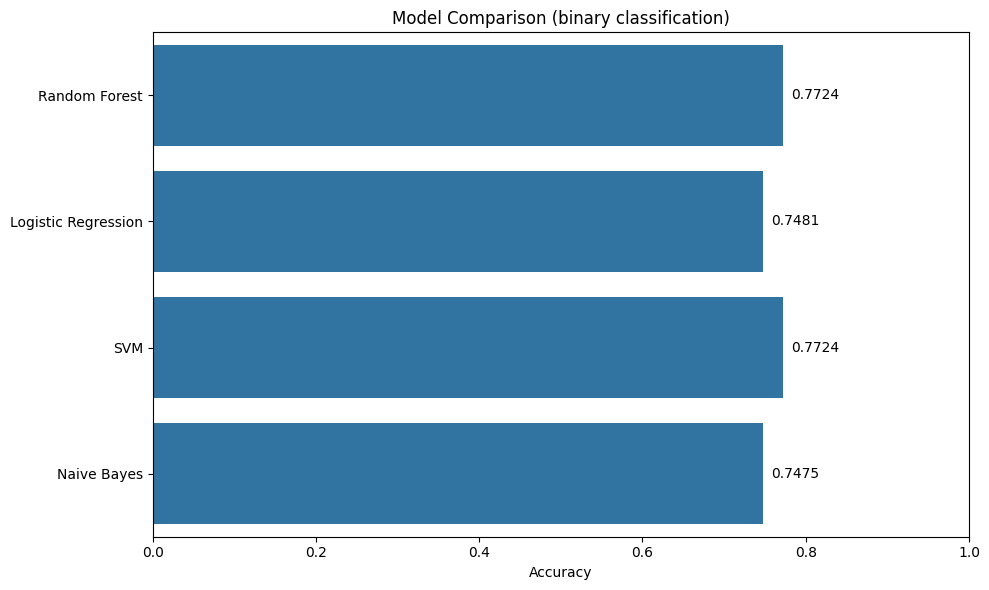

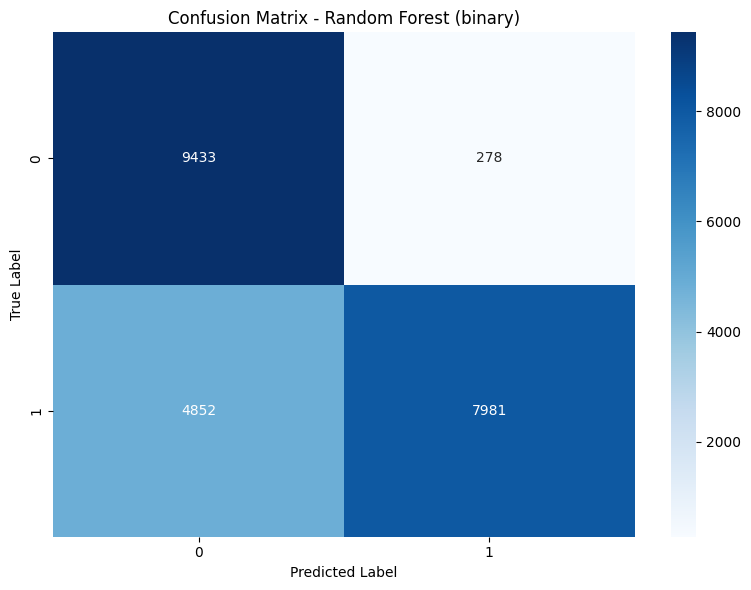


Multiclass Classification Models:
Training Random Forest...


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

Random Forest Accuracy: 0.7223
Training Logistic Regression...


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

Logistic Regression Accuracy: 0.6865
Training SVM...


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

SVM Accuracy: 0.7087
Training Naive Bayes...
Naive Bayes Accuracy: 0.5824


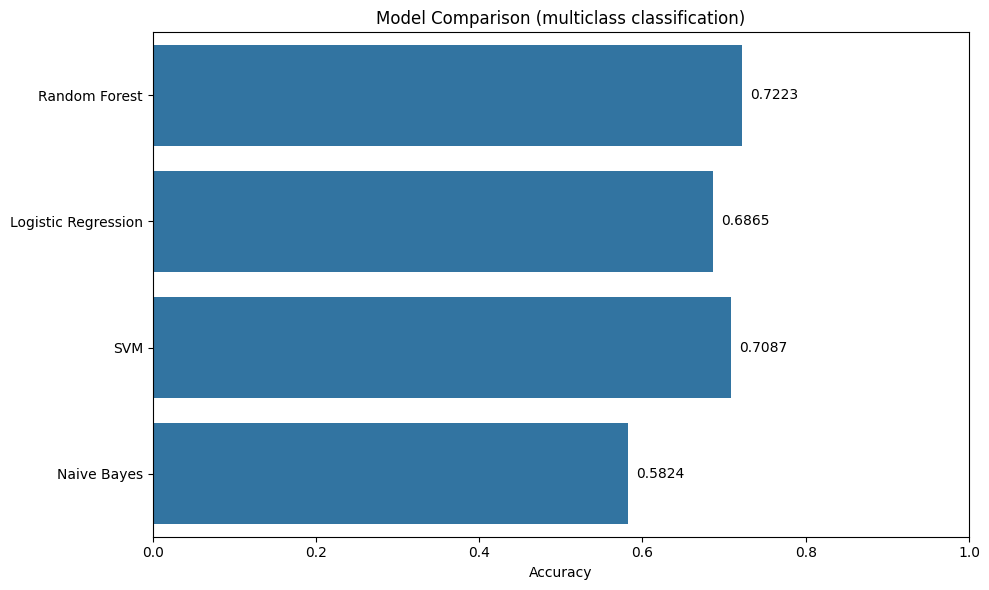

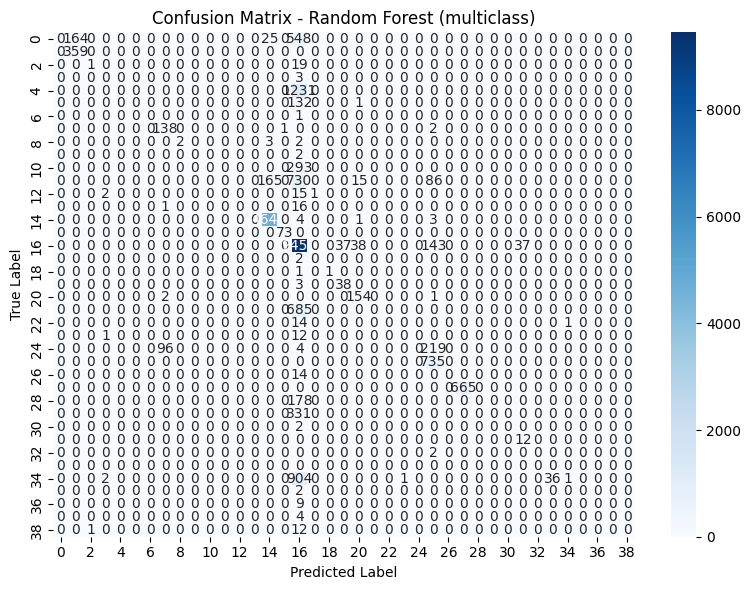

Training completed! Results saved to results/ directory.


<Figure size 640x480 with 0 Axes>

In [13]:
import os
os.makedirs('data/processed', exist_ok=True)
os.makedirs('models', exist_ok=True)
os.makedirs('results', exist_ok=True)

joblib.dump(X_train_selected_scaled, 'data/processed/X_train_scaled.pkl')
joblib.dump(X_test_selected_scaled, 'data/processed/X_test_scaled.pkl')
joblib.dump(y_train_binary, 'data/processed/y_train_binary.pkl')
joblib.dump(y_test_binary, 'data/processed/y_test_binary.pkl')
joblib.dump(y_train_multiclass, 'data/processed/y_train_multiclass.pkl')
joblib.dump(y_test_multiclass, 'data/processed/y_test_multiclass.pkl')


%run src/train_model.py

In [14]:
%%writefile src/predict.py

import pandas as pd
import numpy as np
import joblib
import sys

def predict_attack_type(features):
    """
    Predict if a network connection is an attack or normal

    Parameters:
    features (list or array): Feature values for a single connection

    Returns:
    dict: Prediction results with probabilities
    """

    try:
        model = joblib.load('models/random_forest_binary.pkl')
        scaler = joblib.load('models/scaler_selected.pkl')
        selected_features = joblib.load('models/selected_features.pkl')
    except FileNotFoundError as e:
        print(f"Error loading model files: {e}")
        print("Please make sure you've trained the model first.")
        return None

    features_df = pd.DataFrame([features], columns=selected_features)


    features_scaled = scaler.transform(features_df)


    prediction = model.predict(features_scaled)
    probabilities = model.predict_proba(features_scaled)


    result = {
        'prediction': 'Attack' if prediction[0] == 1 else 'Normal',
        'confidence': float(probabilities[0][prediction[0]]),
        'probabilities': {
            'Normal': float(probabilities[0][0]),
            'Attack': float(probabilities[0][1])
        }
    }

    return result

if __name__ == "__main__":

    if len(sys.argv) > 1:

        features = [float(x) for x in sys.argv[1:]]
    else:

        features = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


    selected_features = joblib.load('models/selected_features.pkl')
    if len(features) != len(selected_features):
        print(f"Error: Expected {len(selected_features)} features, got {len(features)}")
        sys.exit(1)


    result = predict_attack_type(features)

    if result:
        print("Prediction Results:")
        print(f"Type: {result['prediction']}")
        print(f"Confidence: {result['confidence']:.4f}")
        print("Probabilities:")
        print(f"  Normal: {result['probabilities']['Normal']:.4f}")
        print(f"  Attack: {result['probabilities']['Attack']:.4f}")

Writing src/predict.py


In [15]:
%%writefile README.md

# Network Intrusion Detection System (NIDS) with Machine Learning

This project implements a Machine Learning-based Network Intrusion Detection System using the NSL-KDD dataset.

## Project Structure


Writing README.md


In [17]:
# Create the predict.py file
%%writefile src/predict.py

import pandas as pd
import numpy as np
import joblib
import sys

def predict_attack_type(features):
    """
    Predict if a network connection is an attack or normal

    Parameters:
    features (list or array): Feature values for a single connection

    Returns:
    dict: Prediction results with probabilities
    """
    # Load the trained model and preprocessing objects
    try:
        model = joblib.load('models/random_forest_binary.pkl')
        scaler = joblib.load('models/scaler_selected.pkl')
        selected_features = joblib.load('models/selected_features.pkl')
    except FileNotFoundError as e:
        print(f"Error loading model files: {e}")
        print("Please make sure you've trained the model first.")
        return None

    # Convert features to DataFrame with correct column names
    features_df = pd.DataFrame([features], columns=selected_features)

    # Scale the features
    features_scaled = scaler.transform(features_df)

    # Make prediction
    prediction = model.predict(features_scaled)
    probabilities = model.predict_proba(features_scaled)

    # Return results
    result = {
        'prediction': 'Attack' if prediction[0] == 1 else 'Normal',
        'confidence': float(probabilities[0][prediction[0]]),
        'probabilities': {
            'Normal': float(probabilities[0][0]),
            'Attack': float(probabilities[0][1])
        }
    }

    return result

if __name__ == "__main__":
    # Example usage
    if len(sys.argv) > 1:
        # Read features from command line
        features = [float(x) for x in sys.argv[1:]]
    else:
        # Use sample features (replace with actual values)
        features = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

    # Ensure we have the right number of features
    selected_features = joblib.load('models/selected_features.pkl')
    if len(features) != len(selected_features):
        print(f"Error: Expected {len(selected_features)} features, got {len(features)}")
        sys.exit(1)

    # Make prediction
    result = predict_attack_type(features)

    if result:
        print("Prediction Results:")
        print(f"Type: {result['prediction']}")
        print(f"Confidence: {result['confidence']:.4f}")
        print("Probabilities:")
        print(f"  Normal: {result['probabilities']['Normal']:.4f}")
        print(f"  Attack: {result['probabilities']['Attack']:.4f}")

# Download the file
files.download('src/predict.py')

Overwriting src/predict.py
